0 44.367332458496094
1 20.02922821044922
2 9.190592765808105
3 4.361600399017334
4 2.2079877853393555
5 1.2454333305358887
6 0.8131593465805054
7 0.6170042753219604
8 0.5260168313980103
9 0.481900155544281
10 0.45869946479797363
11 0.4448625445365906
12 0.43524396419525146
13 0.4275529682636261
14 0.4207696318626404
15 0.41443735361099243
16 0.4083550274372101
17 0.40243011713027954
18 0.3966212272644043
19 0.39090973138809204
20 0.38528674840927124
21 0.3797476291656494
22 0.37428927421569824
23 0.36890923976898193
24 0.3636072874069214
25 0.35838204622268677
26 0.3532309830188751
27 0.3481544852256775
28 0.34315112233161926
29 0.3382194936275482
30 0.3333587646484375
31 0.3285678029060364
32 0.3238455057144165
33 0.3191915452480316
34 0.31460437178611755
35 0.3100830912590027
36 0.3056265413761139
37 0.30123406648635864
38 0.2969052195549011
39 0.2926380932331085
40 0.2884325683116913
41 0.2842869162559509
42 0.2802014648914337
43 0.2761743664741516
44 0.27220553159713745
45 0.268293

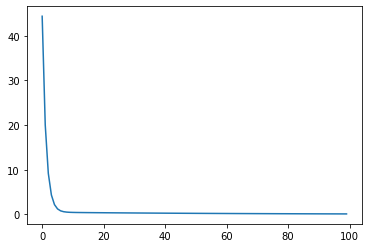

In [12]:
import torch
import matplotlib.pyplot as plt
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个数据，每个数据只有1个特征
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # model.parameters()自动完成参数的初始化操作
 
loss_list=[]

# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    print(epoch, loss.item())
    loss_list.append(loss)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

plt.plot(range(100),loss_list)
plt.show()